In [38]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

color = sns.color_palette()
sns.set_style('darkgrid')

In [33]:
## Load The Data
train = pd.read_csv('./Datasets/train.csv', parse_dates=['date'])
train.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
date     913000 non-null datetime64[ns]
store    913000 non-null int64
item     913000 non-null int64
sales    913000 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [35]:
## Check MIssing Values
train.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [36]:
## per 1 store per 1 item
train_df = train[train['store']==1]
train_df = train_df[train['item'] == 1]
train_df['year'] = train['date'].dt.year
train_df['month'] = train['date'].dt.month
train_df['day'] = train['date'].dt.dayofyear
train_df['weekday'] = train['date'].dt.weekday

train_df.head()

,date,store,item,sales,year,month,day,weekday
0,2013-01-01,1,1,13,2013,1,1,1
1,2013-01-02,1,1,11,2013,1,2,2
2,2013-01-03,1,1,14,2013,1,3,3
3,2013-01-04,1,1,13,2013,1,4,4
4,2013-01-05,1,1,10,2013,1,5,5


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1826 entries, 0 to 1825
Data columns (total 8 columns):
date       1826 non-null datetime64[ns]
store      1826 non-null int64
item       1826 non-null int64
sales      1826 non-null int64
year       1826 non-null int64
month      1826 non-null int64
day        1826 non-null int64
weekday    1826 non-null int64
dtypes: datetime64[ns](1), int64(7)
memory usage: 128.4 KB


## Decompose The Series

To start with, we want to decompose the data to seperate the seasonality, trend and residual. Since we have 5 years of sales data. We would expect there's a yearly or weekly pattern. Let's use a function in statsmodels to help us find it.

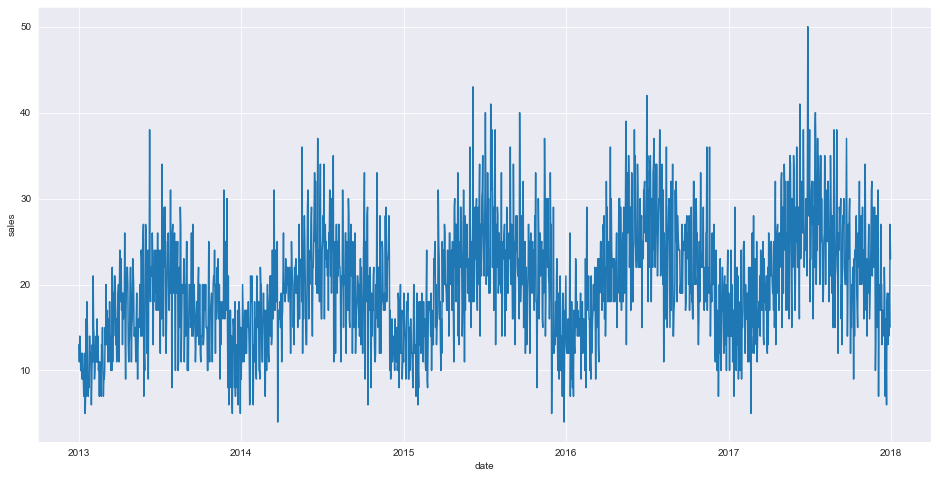

In [28]:
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="sales", data=train_df, legend='full')
plt.show()

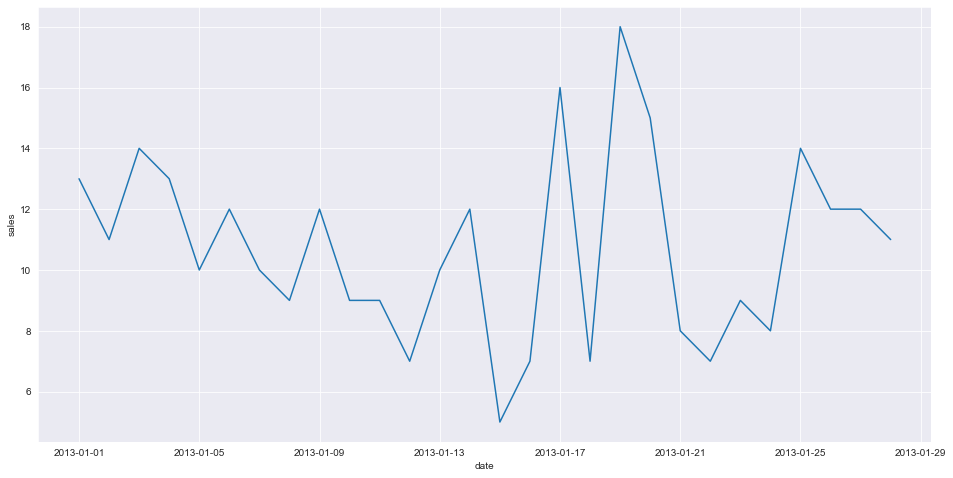

In [29]:
## Plot only for 28 days
plt.figure(figsize=(16,8))
sns.lineplot(x="date", y="sales", data=train_df[:28], legend='full')
plt.show()

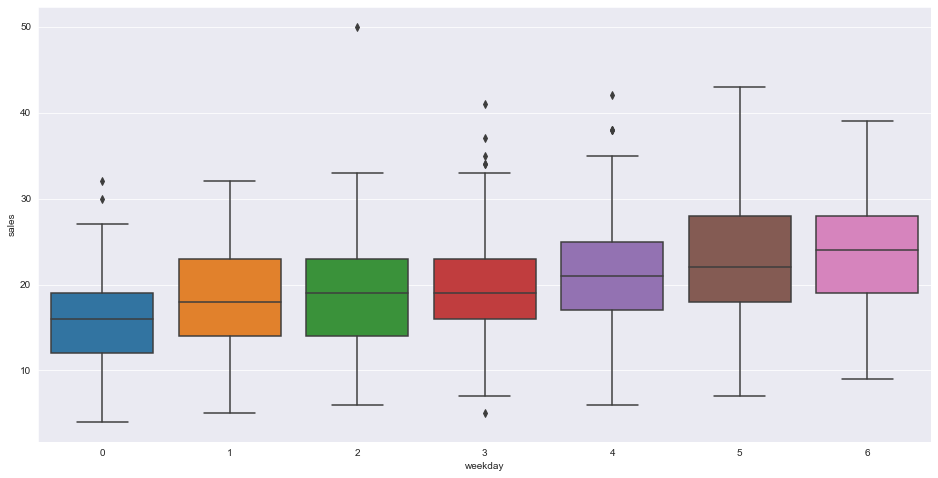

In [30]:
## Plot sales for weekday
plt.figure(figsize=(16,8))
sns.boxplot(x="weekday", y="sales", data=train_df)
plt.show()

Monday=0, Sunday=6.
Here we can find the weekends(5,6) has a larger sales, weekdays(0-4) are smaller. There's a few outliers on Monday, Wed.

In [37]:
## set the date column as index and convert the sales column to float type
train_df = train_df.set_index('date')
train_df['sales'] = train_df['sales'].astype(float)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1826 entries, 2013-01-01 to 2017-12-31
Data columns (total 7 columns):
store      1826 non-null int64
item       1826 non-null int64
sales      1826 non-null float64
year       1826 non-null int64
month      1826 non-null int64
day        1826 non-null int64
weekday    1826 non-null int64
dtypes: float64(1), int64(6)
memory usage: 114.1 KB


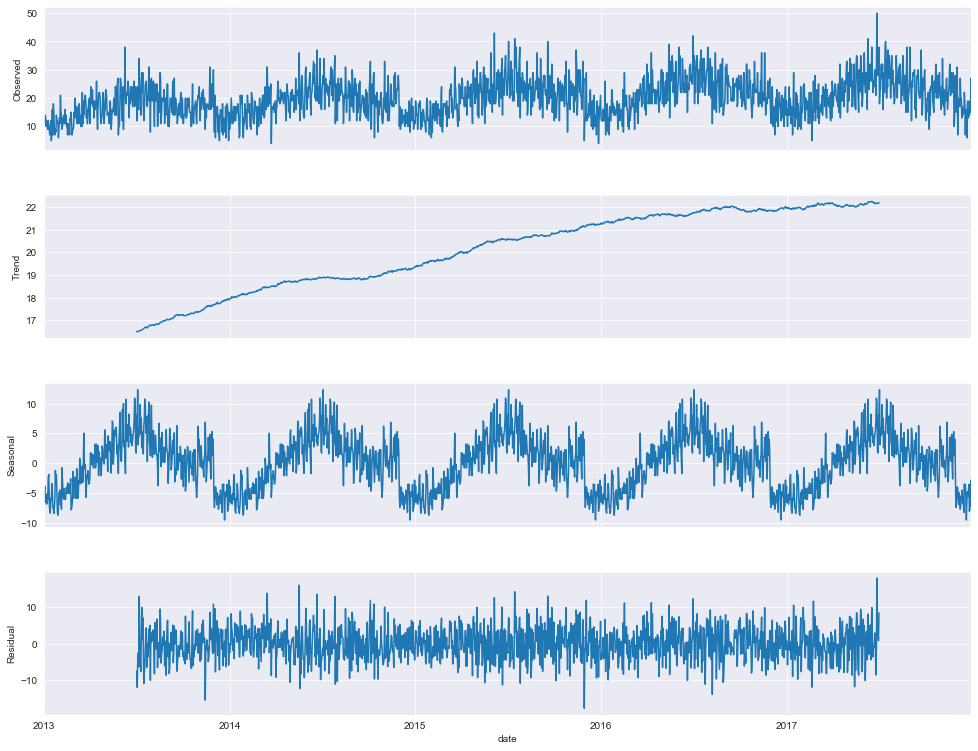

In [43]:
## Plot seasonal decompose
results = seasonal_decompose(train_df['sales'], model='additive', freq=365)
fig = results.plot()
fig.set_size_inches(15, 12)

Playing with a few frequency, the yearly pattern is very obvious. and also we can see a upwards trend. Which means this data is not stationary.